In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential  
from keras.layers import Dense, Input

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)   # One-hot encoding for categorical variables

In [5]:
X = data.drop('charges', axis=1)  #Features
y = data['charges'] #Target variable

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting the dataset

In [7]:
scaler = StandardScaler()    #Standardizing the data using standard scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Building the neural network
model = Sequential([  
    Input(shape=(X_train.shape[1],)),  # Define the input layer, specifying the input shape (number of features in the training data)
    Dense(128, activation='relu'),  # Add a hidden layer with 128 neurons and ReLU activation function
    Dense(64, activation='relu'),  # Add another hidden layer with 64 neurons and ReLU activation function
    Dense(32, activation='relu'),  # Add another hidden layer with 32 neurons and ReLU activation function
    Dense(1)  # Add the output layer with 1 unit (for regression output, no activation function)
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae']) #adam is used as optimizer

In [10]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1) 

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 311402048.0000 - mae: 13079.3447 - val_loss: 323325600.0000 - val_mae: 12964.9082
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 300253344.0000 - mae: 12955.5205 - val_loss: 322548352.0000 - val_mae: 12940.2246
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 335665152.0000 - mae: 13630.0488 - val_loss: 318756576.0000 - val_mae: 12827.4756
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 300180480.0000 - mae: 12758.3770 - val_loss: 306349056.0000 - val_mae: 12472.0938
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 314056992.0000 - mae: 12839.7891 - val_loss: 276846080.0000 - val_mae: 11627.8438
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 264511472.0000 - mae: 11843.8467 - val_loss: 223210624.0000 - val_mae: 10049.7910
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 193243792.0000 - mae: 9566.3438 - val_loss: 150786928.0000 - val_mae: 7850.0728
Epoch 8/100
34

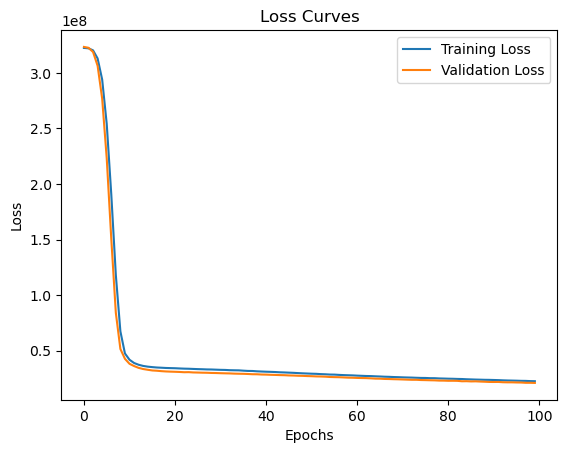

In [11]:
# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss') # Plot the training loss values for each epoch
plt.plot(history.history['val_loss'], label='Validation Loss') # Plot the validation loss values for each epoch
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

In [12]:
# model evaluation
y_pred = model.predict(X_test) #Use the trained model to predict outputs for the test dataset
mse = mean_squared_error(y_test, y_pred) #Calculate the Mean Squared Error between actual and predicted values
mae = mean_absolute_error(y_test, y_pred) #Calculate the Mean Absolute Error between actual and predicted values
r2 = r2_score(y_test, y_pred) #Calculate the R-square value

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Mean Squared Error (MSE): 21015893.437381104
Mean Absolute Error (MAE): 2755.737013496152
R-squared (R2): 0.8646308202621629
